<a href="https://colab.research.google.com/github/shestakovm/collabproject/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D1%86%D0%B5%D0%BD%D1%8B_%D0%B4%D0%BE%D0%BC%D0%B0_%D0%BF%D0%BE_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D1%83_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача:
1. Сделать парсинг и обработку данных.
2. Разделить данные на обучающую и проверочную выборки
3. Написать нейронную сеть для регрессии
4. Сделать визуализацию результата
5. Описать результаты и выводы

In [ ]:
import numpy as np #Библиотека работы с массивами
import pandas as pd # Библиотека для работы с базами

from tensorflow.keras.models import Sequential, Model # 
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback, ModelCheckpoint  # подключаем колбэки
from sklearn.preprocessing import StandardScaler # 
from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #
#from google.colab import files #Для загрузки своего файла
from google.colab import files
import random #Для генерации случайных чисел 
import math # Для округления
#import os #Для работы с файлами 
import re #
import matplotlib.pyplot as plt #
%matplotlib inline

from IPython.display import clear_output

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/neural/pandas/Boston.csv', encoding='cp1250', index_col = 0)

 Переменные по порядку:

 CRIM - уровень преступности на душу населения по городам

 ZN -  доля земли под жилую застройку зонирована под участки площадью более 25 000 кв.м.

 INDUS - доля акров неторгового бизнеса на город
 Фиктивная переменная 

 CHAS Charles River (= 1, если участок граничит с рекой; 0 в противном случае)

 NOX - Концентрация оксидов азота  (частей на 10 миллионов)

 RM  - среднее количество комнат в жилом помещении

 AGE - Доля  квартир, занимаемых владельцами, построенных до 1940 г.

 DIS - взвешивает расстояния до пяти центров занятости Бостона

 RAD -  индекс доступности к радиальным магистралям

 TAX - Полная ставка налога на имущество за 10 000 долларов США

 PTRATIO - Соотношение учеников и учителей  по городам

 B 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам.

 LSTAT - % более низкого статуса населения
 
 MEDV  - Средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

In [ ]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data.drop(columns=['zn', 'indus', 'black', 'age', 'nox'], axis=1, inplace=True) #удаление "ненужных" столбцов
data

,crim,chas,rm,dis,rad,tax,ptratio,lstat,medv
1,0.00632,0,6.575,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,6.421,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.185,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,6.998,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,7.147,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...
502,0.06263,0,6.593,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0,6.120,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0,6.976,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0,6.794,2.3889,1,273,21.0,6.48,22.0


In [ ]:
X_train = np.array(data[['crim','chas', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'lstat']].astype('int')) # преобразование данных в нампай
Y_train = np.array(data[['medv']].astype('int'))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2) # разбиение по выборкам

In [ ]:
def best_weight(lst, val, model_name): # 
  if min(lst) >=val: # если значение мае меньше всех предыдущих значений которые когда либо были, то
    model.save(model_name)

In [ ]:
def on_epoch_end(epoch, logs):
  best_weight()

In [ ]:
gdrive_path = "/content/drive/My Drive/Colab Notebooks/Data/"

In [ ]:
# filename = gdrive_path + "test.txt"

# with open(filename , 'w') as file:
#     file.write('whatever')

# !ls "/content/drive/My Drive/Colab Notebooks/Data"   

test.txt


In [ ]:
#pltMae = LambdaCallback(on_epoch_end=on_epoch_end)
checkpoint = ModelCheckpoint(gdrive_path + "best_weights.hdf5", monitor='loss', verbose=1, save_best_only=True, save_weights_only = True, mode='auto', period=1)

In [ ]:
model = Sequential()
#1
model.add(Dense(256, input_dim=8, activation='relu'))
model.add(Dropout(0.1))
#2
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
#3
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
#4
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#5
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

#6
model.add(Dense(1, activation='linear')) # предсказание цены
model.compile(optimizer='adam', loss='MAE')

In [ ]:
history = model.fit(x_train, y_train, batch_size=5, epochs=100, validation_data=(x_test, y_test), verbose=1, callbacks=[checkpoint])

Epoch 1/100
81/81 [==============================] - ETA: 0s - loss: 14.0987
Epoch 1: loss improved from inf to 14.09872, saving model to /content/drive/My Drive/Colab Notebooks/Data/best_weights.hdf5
81/81 [==============================] - 2s 10ms/step - loss: 14.0987 - val_loss: 14.7025
Epoch 2/100
71/81 [=========================>....] - ETA: 0s - loss: 8.7646
Epoch 2: loss improved from 14.09872 to 8.69400, saving model to /content/drive/My Drive/Colab Notebooks/Data/best_weights.hdf5
81/81 [==============================] - 0s 6ms/step - loss: 8.6940 - val_loss: 10.2706
Epoch 3/100
75/81 [==========================>...] - ETA: 0s - loss: 7.8947
Epoch 3: loss improved from 8.69400 to 7.85467, saving model to /content/drive/My Drive/Colab Notebooks/Data/best_weights.hdf5
81/81 [==============================] - 1s 7ms/step - loss: 7.8547 - val_loss: 6.9558
Epoch 4/100
72/81 [=========================>....] - ETA: 0s - loss: 7.3600
Epoch 4: loss improved from 7.85467 to 7.31257, sav

In [ ]:
# дообучение модели
model.compile(optimizer=Adam(lr=0.0005), loss='MAE')
history = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test), verbose=1, callbacks=[checkpoint])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
38/41 [==========================>...] - ETA: 0s - loss: 4.1678
Epoch 1: loss improved from 4.48645 to 4.19457, saving model to /content/drive/My Drive/Colab Notebooks/Data/best_weights.hdf5
41/41 [==============================] - 4s 26ms/step - loss: 4.1946 - val_loss: 2.9798
Epoch 2/100
41/41 [==============================] - ETA: 0s - loss: 4.2562
Epoch 2: loss did not improve from 4.19457
41/41 [==============================] - 1s 14ms/step - loss: 4.2562 - val_loss: 3.5402
Epoch 3/100
37/41 [==========================>...] - ETA: 0s - loss: 3.8546
Epoch 3: loss improved from 4.19457 to 4.03090, saving model to /content/drive/My Drive/Colab Notebooks/Data/best_weights.hdf5
41/41 [==============================] - 1s 13ms/step - loss: 4.0309 - val_loss: 2.7194
Epoch 4/100
35/41 [========================>.....] - ETA: 0s - loss: 4.1775
Epoch 4: loss did not improve from 4.03090
41/41 [==============================] - 0s 10ms/step - loss: 4.1116 - val_loss: 2.8412
Epoc

In [ ]:
# дообучение модели
model.compile(optimizer=Adam(lr=0.0004), loss='MAE')
history = model.fit(x_train, y_train, batch_size=15, epochs=100, validation_data=(x_test, y_test), verbose=1, callbacks=[checkpoint])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


18/27 [===================>..........] - ETA: 0s - loss: 3.4933
Epoch 1: loss did not improve from 3.45814
27/27 [==============================] - 1s 13ms/step - loss: 3.6063 - val_loss: 2.7922
Epoch 2/100
20/27 [=====================>........] - ETA: 0s - loss: 3.4700
Epoch 2: loss improved from 3.45814 to 3.43833, saving model to /content/drive/My Drive/Colab Notebooks/Data/best_weights.hdf5
27/27 [==============================] - 0s 15ms/step - loss: 3.4383 - val_loss: 2.6237
Epoch 3/100
19/27 [====================>.........] - ETA: 0s - loss: 3.8141
Epoch 3: loss did not improve from 3.43833
27/27 [==============================] - 0s 8ms/step - loss: 3.7188 - val_loss: 3.1291
Epoch 4/100
20/27 [=====================>........] - ETA: 0s - loss: 3.2800
Epoch 4: loss improved from 3.43833 to 3.31586, saving model to /content/drive/My Drive/Colab Notebooks/Data/best_weights.hdf5
27/27 [==============================] - 0s 9ms/step - loss: 3.3159 - val_loss: 3.2211
Epoch 5/100
19/27 

In [ ]:
# дообучение модели
model.compile(optimizer=Adam(lr=0.0001), loss='MAE')
history = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_test, y_test), verbose=1, callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
18/21 [========================>.....] - ETA: 0s - loss: 3.1318
Epoch 1: loss improved from 3.17773 to 3.15775, saving model to /content/drive/My Drive/Colab Notebooks/Data/best_weights.hdf5
21/21 [==============================] - 4s 41ms/step - loss: 3.1577 - val_loss: 3.0824
Epoch 2/100
20/21 [===========================>..] - ETA: 0s - loss: 3.1718
Epoch 2: loss did not improve from 3.15775
21/21 [==============================] - 0s 14ms/step - loss: 3.1918 - val_loss: 2.9247
Epoch 3/100
20/21 [===========================>..] - ETA: 0s - loss: 3.2654
Epoch 3: loss did not improve from 3.15775
21/21 [==============================] - 0s 14ms/step - loss: 3.2775 - val_loss: 2.7867
Epoch 4/100
17/21 [=======================>......] - ETA: 0s - loss: 3.1735
Epoch 4: loss did not improve from 3.15775
21/21 [==============================] - 0s 13ms/step - loss: 3.2520 - val_loss: 2.7808
Epoch 5/100
19/21 [==========================>...] - ETA: 0s - loss: 3.2787
Epoch 5: los

In [ ]:
# дообучение модели
model.compile(optimizer=Adam(lr=0.00005), loss='MAE')
history = model.fit(x_train, y_train, batch_size=15, epochs=100, validation_data=(x_test, y_test), verbose=1, callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
24/27 [=========================>....] - ETA: 0s - loss: 3.3276
Epoch 1: loss did not improve from 2.94206
27/27 [==============================] - 3s 24ms/step - loss: 3.2905 - val_loss: 2.8499
Epoch 2/100
25/27 [==========================>...] - ETA: 0s - loss: 3.2222
Epoch 2: loss did not improve from 2.94206
27/27 [==============================] - 0s 11ms/step - loss: 3.1685 - val_loss: 2.9048
Epoch 3/100
26/27 [===========================>..] - ETA: 0s - loss: 3.3349
Epoch 3: loss did not improve from 2.94206
27/27 [==============================] - 0s 13ms/step - loss: 3.3018 - val_loss: 2.9274
Epoch 4/100
27/27 [==============================] - ETA: 0s - loss: 3.3801
Epoch 4: loss did not improve from 2.94206
27/27 [==============================] - 0s 11ms/step - loss: 3.3801 - val_loss: 2.9951
Epoch 5/100
25/27 [==========================>...] - ETA: 0s - loss: 3.1973
Epoch 5: loss did not improve from 2.94206
27/27 [==============================] - 0s 12ms/step

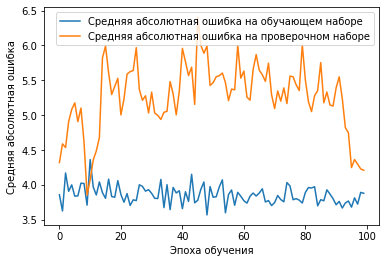

In [ ]:
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
mean = data['medv'].mean()
print(mean)

22.532806324110677


Таким образом получилось добиться отклонения в 2,78 тыс долларов. Что составляет 12% от средней цены